# **Problem Statement**

*BrightPath Academy requires a system that identifies delayed at-risk students early, provides actionable insights on using students' existing data and evaluates the impact of extracurricular activities on academic performance.*

# Hypothesis

**Challenge**: Identification of At-Risk Students
    Students with low study time and high absencies are likely to fall under lower grade classes.

**Challenge**: Targeted Support Strategies
    Students recieving tutoring will perform better than those who do not.

**Challenge**: Impact of Extracurricular Activities
    Students who participate in extracurricular activities are more likely to perform well in academics.

**Challange**: Parental Involvement
    Students with high levels of parental support are likely to perform better than those with lower levels of parental support in academics.

# Initial Checks

***Data Loading and Dataset Overview***

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
import tensorflow as tf
import joblib
import os
import warnings as Warning

os.environ["OMP_NUM_THREADS"] = "1"
Warning.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import MinMaxScaler
from IPython.display import display
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.preprocessing import StandardScaler, LabelEncoder
from tensorflow.keras.utils import to_categorical


In [2]:
df = pd.read_csv("Student_performance_data .csv")
display(df)

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,3388,18,1,0,3,10.680555,2,0,4,1,0,0,0,3.455509,0.0
2388,3389,17,0,0,1,7.583217,4,1,4,0,1,0,0,3.279150,4.0
2389,3390,16,1,0,2,6.805500,20,0,2,0,0,0,1,1.142333,2.0
2390,3391,16,1,1,0,12.416653,17,0,2,0,1,1,0,1.803297,1.0


In [3]:
df.shape

(2392, 15)

***Statistics Summary for Numerical Columns***

***Data Type and Non-null Counts***

In [4]:
# 4. Understanding the data
display(df.info())
display(df.describe().T)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


None

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


In [5]:
def correct_grade_class(gpa):
    """
    Returns the correct GradeClass based on GPA.
    Classes:
    0: 'A' (GPA >= 3.5)
    1: 'B' (3.0 <= GPA < 3.5)
    2: 'C' (2.5 <= GPA < 3.0)
    3: 'D' (2.0 <= GPA < 2.5)
    4: 'F' (GPA < 2.0)
    """
    if gpa >= 3.5:
        return 0
    elif gpa >= 3.0:
        return 1
    elif gpa >= 2.5:
        return 2
    elif gpa >= 2.0:
        return 3
    else:
        return 4


df['CorrectedGradeClass'] = df['GPA'].apply(correct_grade_class)
# Check discrepancies
discrepancies = df[df['GradeClass'] != df['CorrectedGradeClass']]
print(f"Number of mismatches: {len(discrepancies)}")

Number of mismatches: 168


In [6]:
df.drop(columns=['StudentID'], inplace=True)

***Missing Value Checks***

In [7]:
df.isnull()

,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass,CorrectedGradeClass
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2387,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2388,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2389,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2390,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
df.isnull().sum()

Age                    0
Gender                 0
Ethnicity              0
ParentalEducation      0
StudyTimeWeekly        0
Absences               0
Tutoring               0
ParentalSupport        0
Extracurricular        0
Sports                 0
Music                  0
Volunteering           0
GPA                    0
GradeClass             0
CorrectedGradeClass    0
dtype: int64

***Unique Values***

In [9]:
columns = df.copy().drop(columns=['StudyTimeWeekly', 'Absences', 'Age', 'GPA']).columns.tolist()
for col in columns:
    print(f"{col}: {df[col].unique()}")

Gender: [1 0]
Ethnicity: [0 2 1 3]
ParentalEducation: [2 1 3 4 0]
Tutoring: [1 0]
ParentalSupport: [2 1 3 4 0]
Extracurricular: [0 1]
Sports: [0 1]
Music: [1 0]
Volunteering: [0 1]
GradeClass: [2. 1. 4. 3. 0.]
CorrectedGradeClass: [2 1 4 3 0]


**Univariate Analysis**

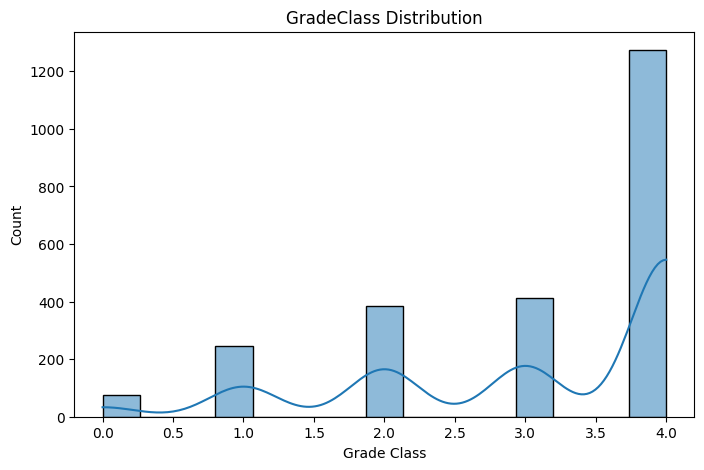

In [10]:
#GradeClass distribution
plt.figure(figsize=(8,5))
sns.histplot(df['CorrectedGradeClass'], bins=15, kde=True)
plt.title('GradeClass Distribution')
plt.xlabel('Grade Class')
plt.ylabel('Count')
plt.show()

Text(0.5, 1.0, 'Study Time (Weekly) Distribution')

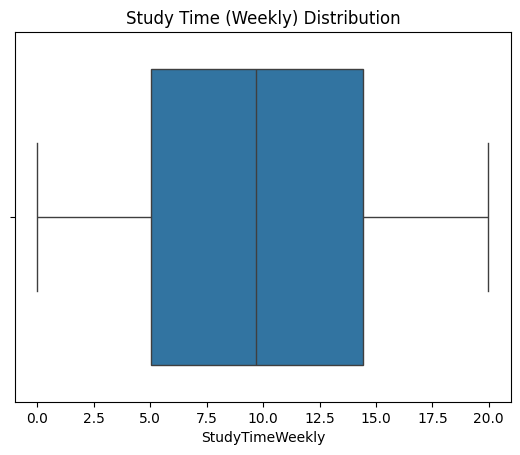

In [11]:
#Study Time Weekly distribution
sns.boxplot(x=df['StudyTimeWeekly'])
plt.title('Study Time (Weekly) Distribution')

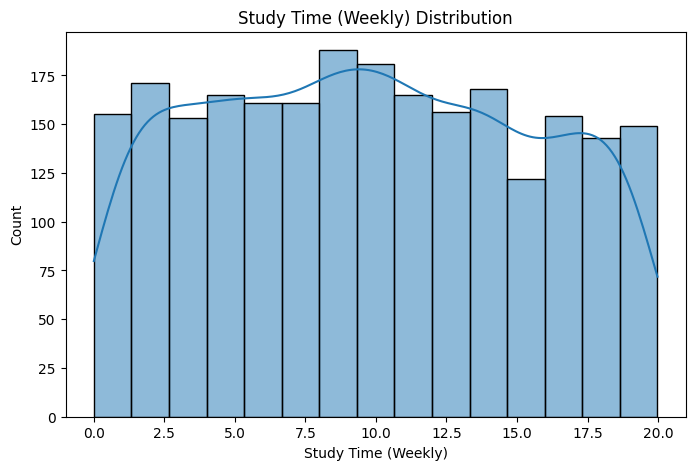

In [12]:
#study time weekly distribution
plt.figure(figsize=(8,5))
sns.histplot(df['StudyTimeWeekly'], bins=15, kde=True)
plt.title('Study Time (Weekly) Distribution')
plt.xlabel('Study Time (Weekly)')
plt.ylabel('Count')
plt.show()

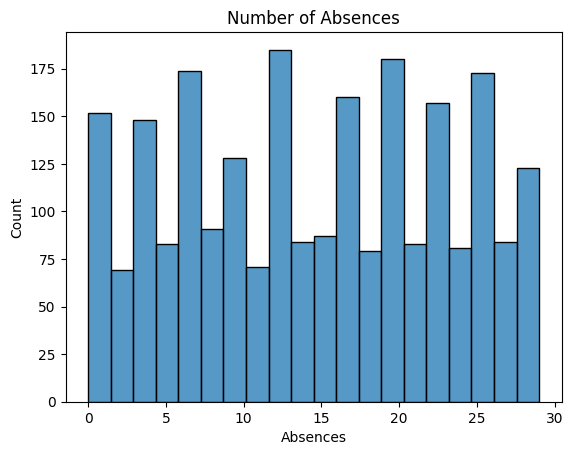

In [13]:
#Absences
sns.histplot(df['Absences'], bins=20)
plt.title("Number of Absences")
plt.xlabel("Absences")
plt.ylabel("Count")
plt.show()

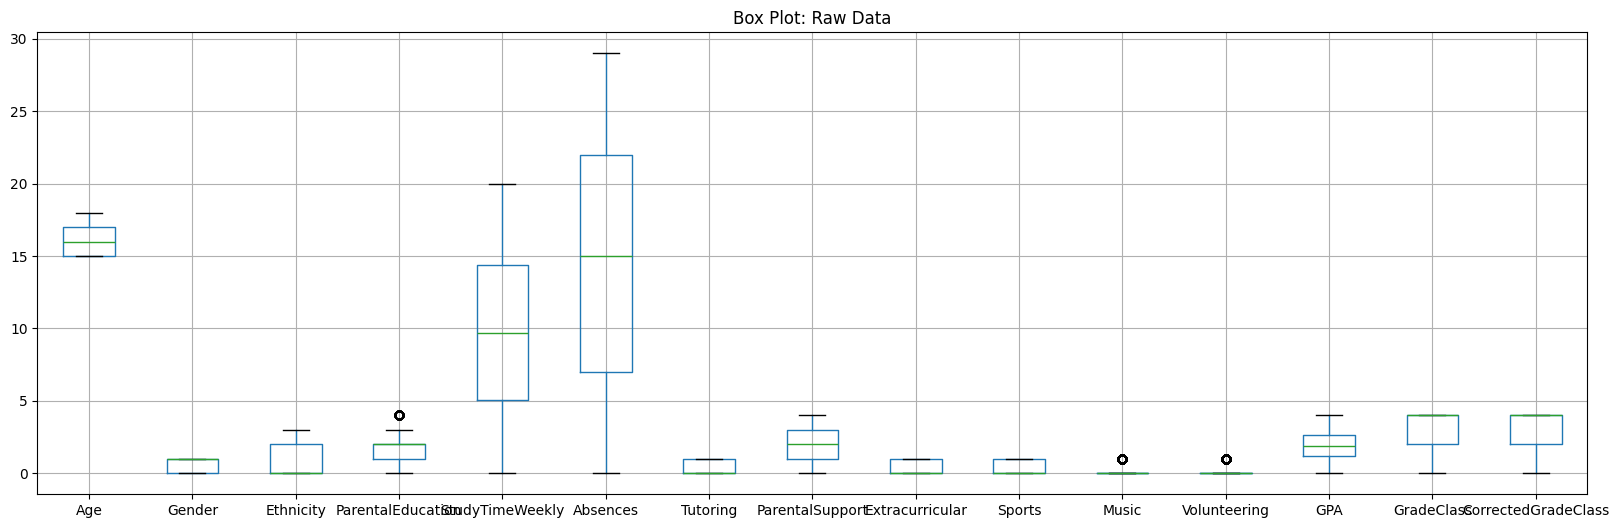

In [14]:
# 5. Exploratory Data Analysis
# i. Perform Univariate Analysis
fig, ax = plt.subplots(figsize=(20, 6))
boxplot = df.boxplot(ax=ax)  
_ = ax.set_title(f'Box Plot: Raw Data')

In [15]:
# #Scaling the data method 1
# # Define columns to scale
# cols_to_scale = ['Absences', 'StudyTimeWeekly', 'Age']
# # Initialize the MinMaxScaler with a custom feature range
# scaler = MinMaxScaler(feature_range=(0, 5))
# # Fit and transform the selected columns
# df[cols_to_scale] = scaler.fit_transform(df[cols_to_scale])

In [16]:
#scale the 'Absences', 'StudyTimeWeekly', 'Age' columns

scaler = StandardScaler()
scaler.fit(df[['Absences', 'StudyTimeWeekly', 'Age']])
scaled_data = scaler.transform(df[['Absences', 'StudyTimeWeekly', 'Age']])
df[['Absences', 'StudyTimeWeekly', 'Age']] = scaled_data

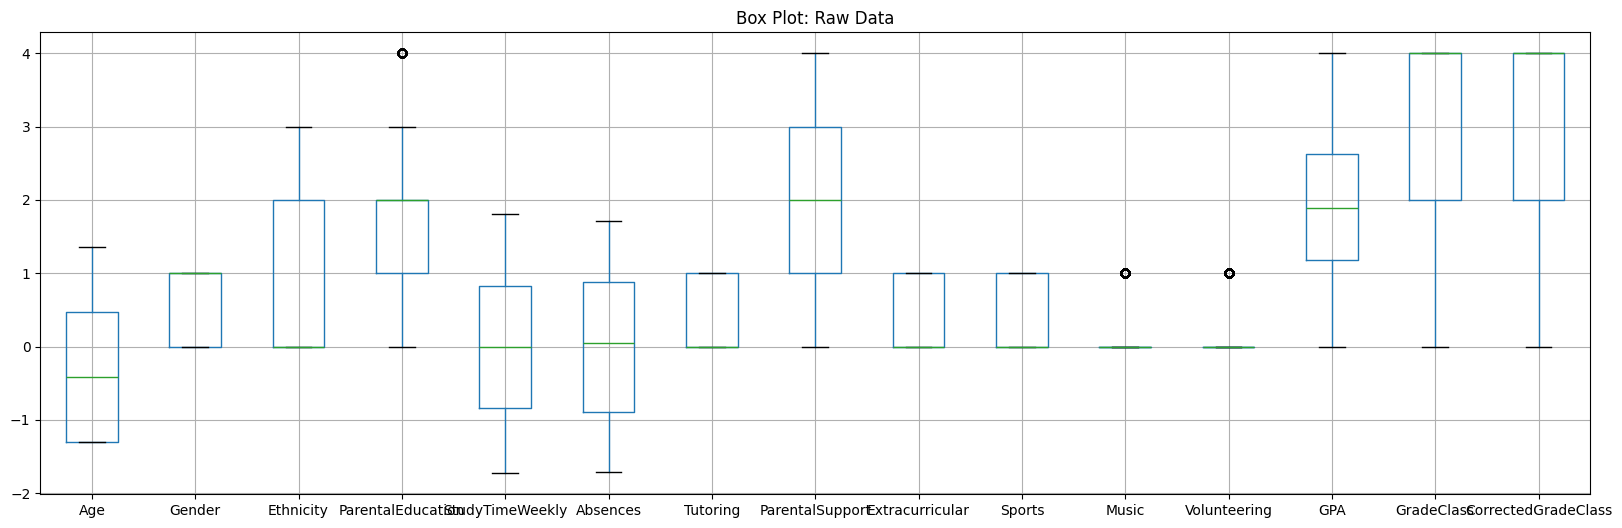

In [17]:
fig, ax = plt.subplots(figsize=(20, 6))
boxplot = df.boxplot(ax=ax)  
_ = ax.set_title(f'Box Plot: Raw Data')

In [18]:
df.drop(columns=['Age','Gender', 'Music', 'GradeClass', 'Volunteering'], inplace=True)

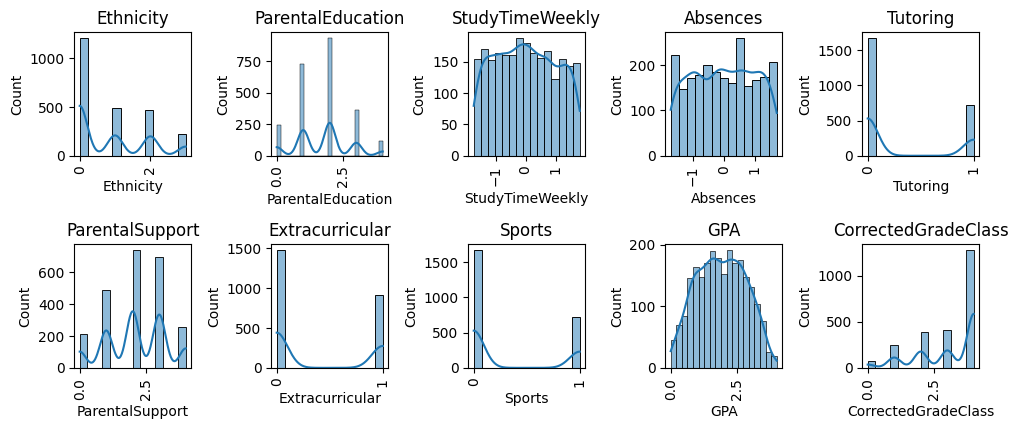

In [19]:
plt.figure(figsize= (10, 6))
for i , col in enumerate(df.columns):
    plt.subplot(3, 5, i + 1)
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [20]:
#scewness
skewness = df.skew()
print(f"Skewness: \n{skewness}")

Skewness: 
Ethnicity              0.759067
ParentalEducation      0.215650
StudyTimeWeekly        0.050068
Absences              -0.026017
Tutoring               0.866045
ParentalSupport       -0.166859
Extracurricular        0.480094
Sports                 0.855253
GPA                    0.014526
CorrectedGradeClass   -0.986713
dtype: float64


In [21]:
correlation = df.corr()['CorrectedGradeClass'].sort_values(ascending=False)
print("\nCorrelation with GradeClass:\n")
print(correlation)


Correlation with GradeClass:

CorrectedGradeClass    1.000000
Absences               0.828662
ParentalEducation      0.029160
Ethnicity             -0.019053
Sports                -0.044481
Extracurricular       -0.087030
Tutoring              -0.122446
ParentalSupport       -0.148267
StudyTimeWeekly       -0.152564
GPA                   -0.890180
Name: CorrectedGradeClass, dtype: float64


**Bivariate Analysis**


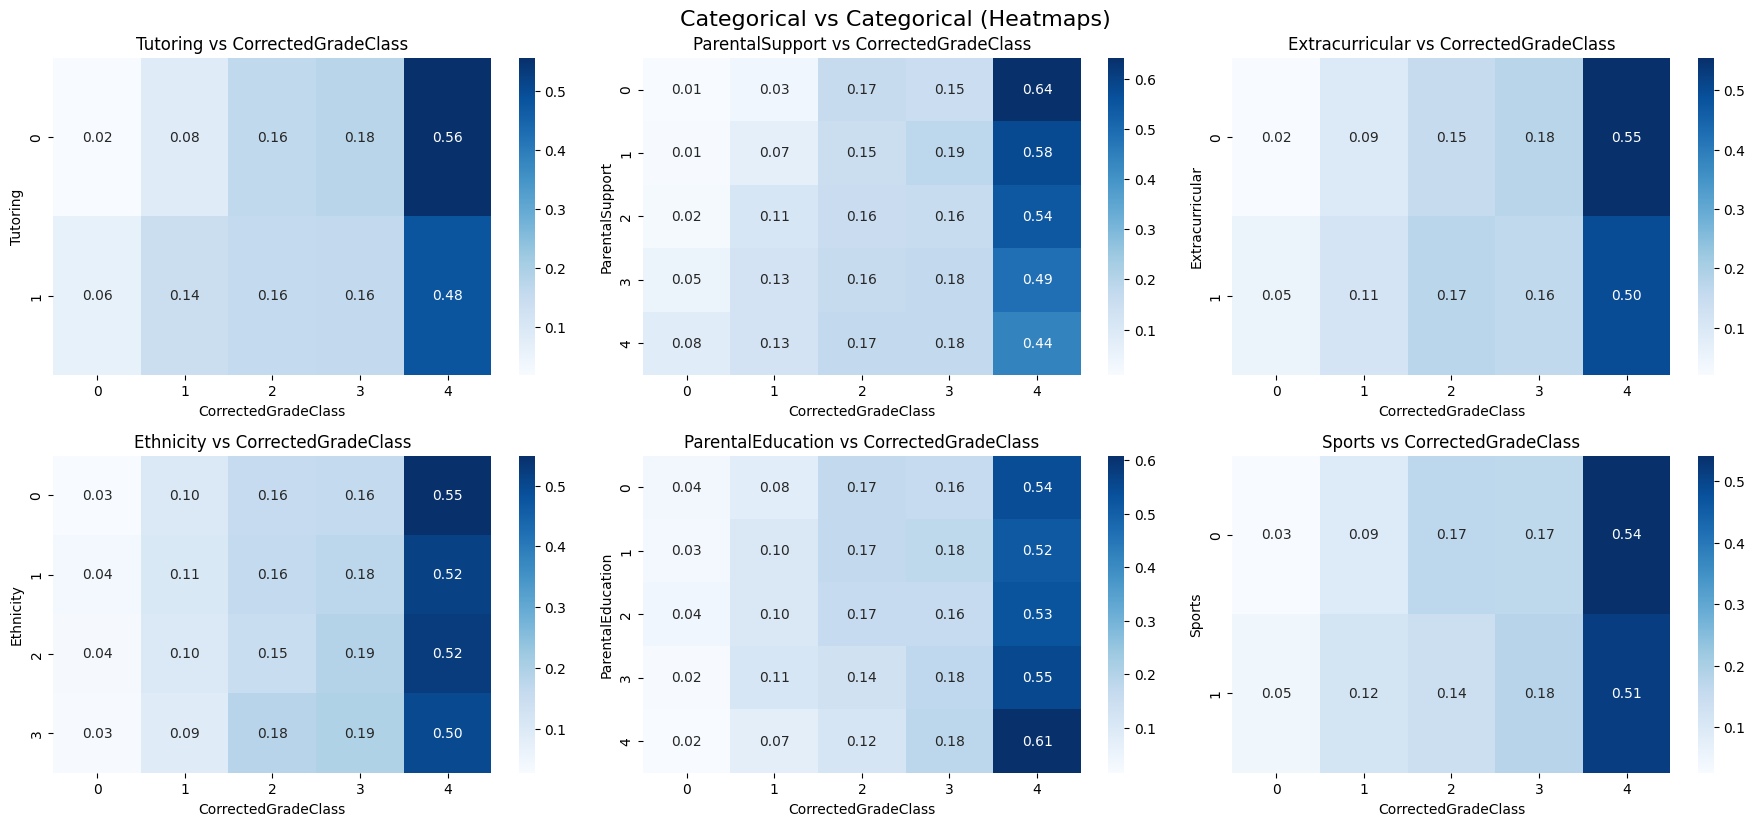

In [22]:
Catagorical_data = ['Tutoring', 'ParentalSupport', 'Extracurricular', 'Ethnicity', 'ParentalEducation', 'Sports' ]
target = 'CorrectedGradeClass'


fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(18, 12))
fig.suptitle("Categorical vs Categorical (Heatmaps)", fontsize=16)
axes = axes.flatten()

for i, col in enumerate(Catagorical_data):
    ct = pd.crosstab(df[col], df[target], normalize='index')
    sns.heatmap(ct, annot=True, fmt=".2f", cmap='Blues', ax=axes[i])
    axes[i].set_title(f"{col} vs {target}")
    axes[i].set_xlabel(target)
    axes[i].set_ylabel(col)

# Remove empty subplots if any
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


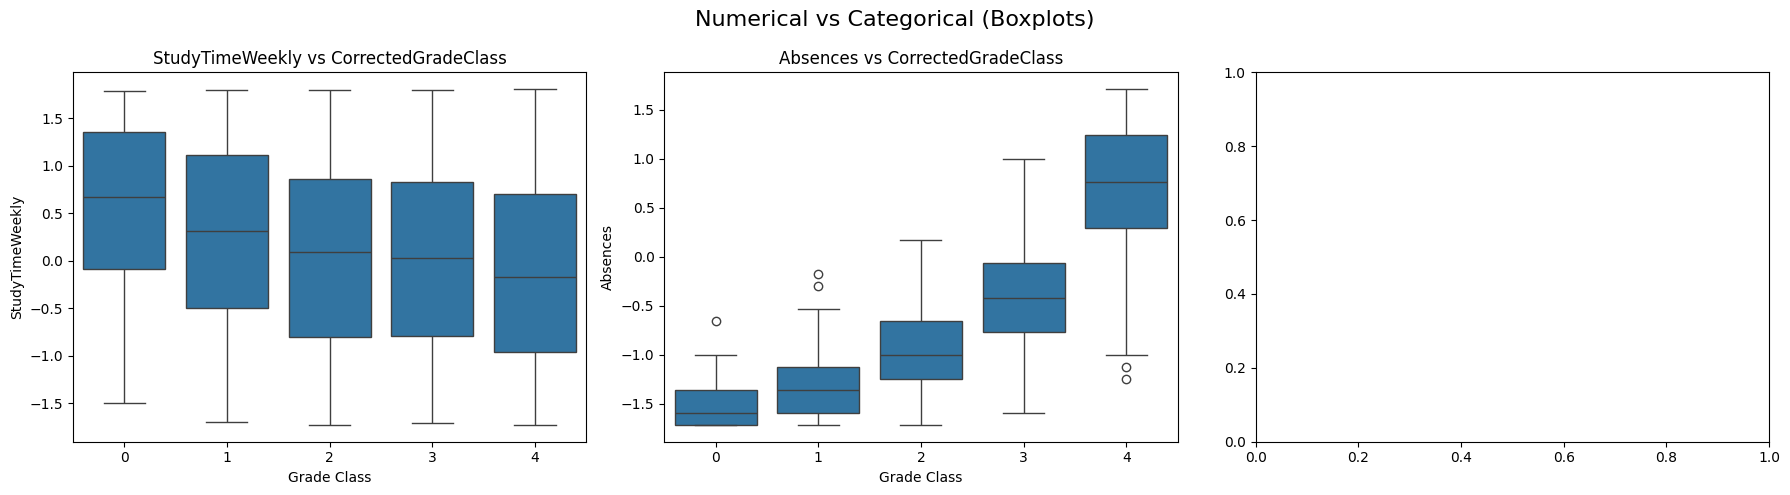

In [23]:
Numerical_data = ['StudyTimeWeekly', 'Absences']

fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5))
fig.suptitle("Numerical vs Categorical (Boxplots)", fontsize=16)

for i, col in enumerate(Numerical_data):
    sns.boxplot(x=target, y=col, data=df, ax=axes[i])
    axes[i].set_title(f"{col} vs {target}")
    axes[i].set_xlabel("Grade Class")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()

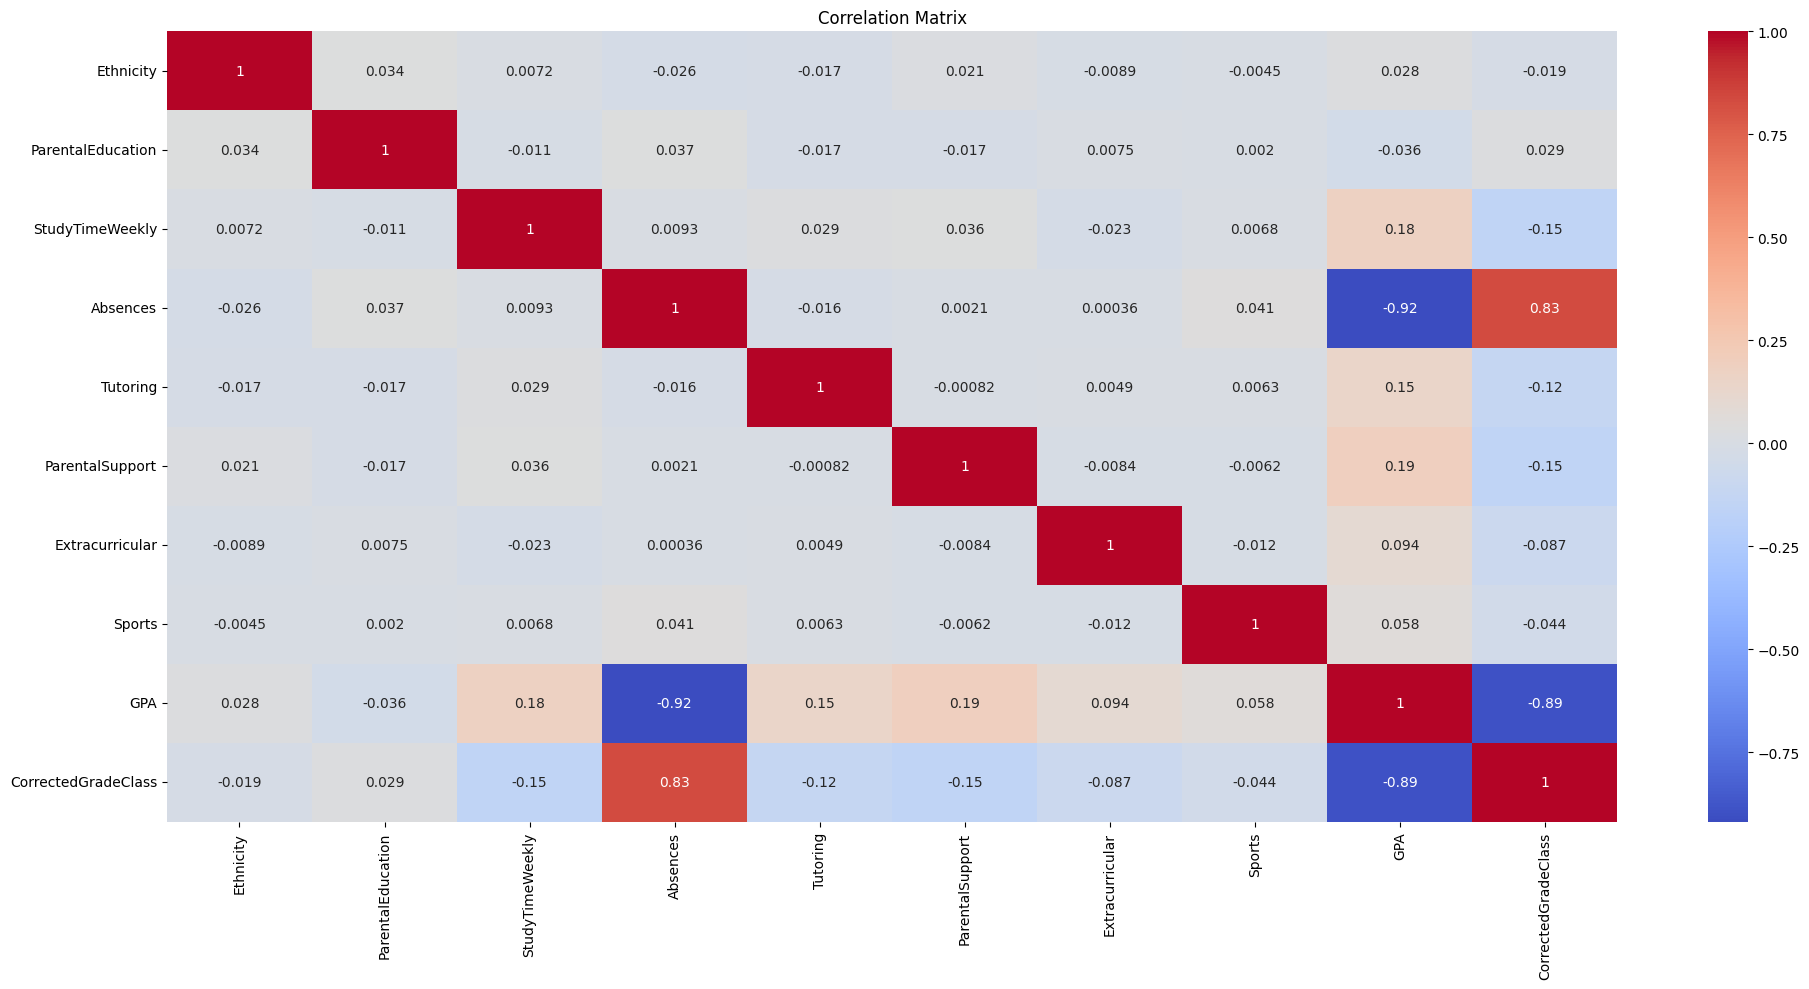

In [24]:
#Correlation Heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

**Missing Value Treatment**

In [25]:
#Check for missing values
df.isnull().sum()

Ethnicity              0
ParentalEducation      0
StudyTimeWeekly        0
Absences               0
Tutoring               0
ParentalSupport        0
Extracurricular        0
Sports                 0
GPA                    0
CorrectedGradeClass    0
dtype: int64

In [26]:
#Fill missing values
df['ParentalSupport'].fillna(df['ParentalSupport'].mode()[0], inplace=True)

**Outlier Treatment (IQR Method)**


In [27]:
#Function to remove outliers using IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return df[(df[column] >= lower) & (df[column] <= upper)]

# Remove outliers
df = remove_outliers(df, 'Absences')
df = remove_outliers(df, 'StudyTimeWeekly')



**Some additional graphs**


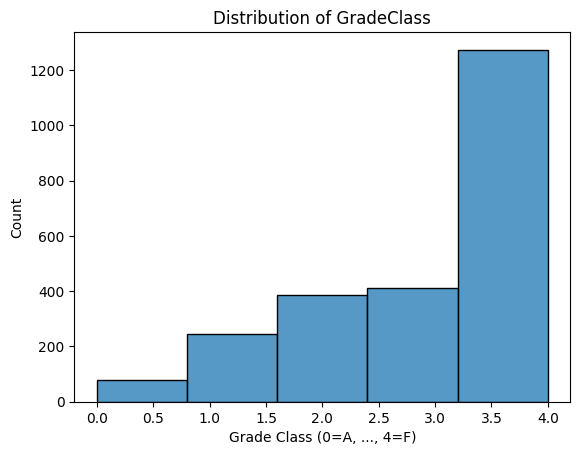

In [28]:
sns.histplot(df['CorrectedGradeClass'], bins=5, kde=False)
plt.title("Distribution of GradeClass")
plt.xlabel("Grade Class (0=A, ..., 4=F)")
plt.ylabel("Count")
plt.show()

**Sigmoid Curve(probability of a student achieving a high GPA based on StudyTimeWeekly)**

In [29]:
#Define sigmoid function
def sigmoid(x):
     return 1 / (1 + np.exp(-x))

In [30]:
#Simulating a classification where the target is: 1 if GPA is 3.5 or above, 0 otherwise
data = pd.DataFrame()
data['GPA_High'] = (df['GPA'] >= 3.5).astype(int)


In [31]:
#Calculating the linear combination
w = 0.35
b = -2.5

data['LinearCombo'] = w * df['StudyTimeWeekly'] + b
data['PredictedProb'] = sigmoid(data['LinearCombo'])
data['StudyTimeWeekly'] = df['StudyTimeWeekly']

In [32]:
#Preview of results
data[['StudyTimeWeekly', 'LinearCombo', 'PredictedProb', 'GPA_High']].head(10)


,StudyTimeWeekly,LinearCombo,PredictedProb,GPA_High
0,1.780336,-1.876883,0.132747,0
1,0.997376,-2.150918,0.104245,0
2,-0.984045,-2.844416,0.054971,0
3,0.045445,-2.484094,0.076981,0
4,-0.902311,-2.815809,0.056476,0
5,-0.279704,-2.597896,0.069274,0
6,1.031513,-2.138971,0.105366,0
7,1.000161,-2.149944,0.104337,0
8,-0.921861,-2.822651,0.056112,0
9,1.534519,-1.962918,0.123152,1


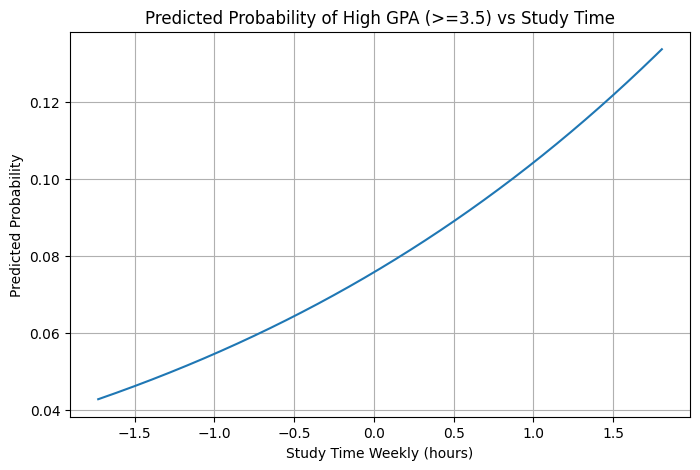

In [33]:
#Visualizing the results
plt.figure(figsize=(8,5))
sns.lineplot(x='StudyTimeWeekly', y='PredictedProb', data=data.sort_values('StudyTimeWeekly'))
plt.title("Predicted Probability of High GPA (>=3.5) vs Study Time")
plt.xlabel("Study Time Weekly (hours)")
plt.ylabel("Predicted Probability")
plt.grid(True)
plt.show()


7. Evaluation Metrics for Classification Problem

In [34]:
# 7. Evaluation Metrics for Classification Problem
# Function to display metrics
def display_model_metrics(model_name, y_true, y_pred):
    print(f'{model_name}:\nClassification Report:')
    print(classification_report(y_true, y_pred))
    

In [35]:
# 8 Feature Engineering
df.drop(columns=['GPA'], inplace=True)
X = df.drop(['CorrectedGradeClass'], axis=1)
y = df['CorrectedGradeClass']
# Scale features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [36]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
# 9. Model Building: Part 1 (Apply baseline ML classification algorithms)
## Logistic Regression
log_model = LogisticRegression(multi_class='multinomial', max_iter=1000, C=0.1, solver='lbfgs')
log_model.fit(X_train, y_train)

LogisticRegression(C=0.1, max_iter=1000, multi_class='multinomial')

In [38]:
## Random Forest
rf_model = RandomForestClassifier(
    n_estimators=100,          # Number of trees
    max_depth=8,              # Limit depth of trees
    min_samples_split=10,      # Minimum samples to split a node
    min_samples_leaf=4,        # Minimum samples at leaf
    bootstrap=True,            # Use bootstrapped datasets
    random_state=42
)
rf_model.fit(X_train, y_train)

RandomForestClassifier(max_depth=8, min_samples_leaf=4, min_samples_split=10,
                       random_state=42)

In [39]:
## XGBoost
xgb_model = xgb.XGBClassifier(
    objective='multi:softmax', 
    num_class=5,
    max_depth=6,               # Limit tree depth
    subsample=0.8,             # Subsample ratio to avoid overfitting
    colsample_bytree=0.8,      # Avoid overfitting by limiting the number of features per tree
    n_estimators=200,          # More trees for better performance
    gamma=1,                   # Regularization term to control complexity of trees
)
xgb_model.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=1, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=200,
              n_jobs=None, num_class=5, ...)

In [40]:
y_train_pred = log_model.predict(X_train)
y_test_pred = log_model.predict(X_test)
display_model_metrics("Logistic regression (Train)", y_train, y_train_pred)
display_model_metrics("Logistic Regression (Test)", y_test, y_test_pred)
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)
display_model_metrics("Random Forest (Train)", y_train, rf_train_pred)
display_model_metrics("Random Forest (Test)", y_test, rf_test_pred)
xgb_train_pred = xgb_model.predict(X_train)
xgb_test_pred = xgb_model.predict(X_test)
display_model_metrics("XGBoost (Train)", y_train, xgb_train_pred)
display_model_metrics("XGBoost (Test)", y_test, xgb_test_pred)

Logistic regression (Train):
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.02      0.03        62
           1       0.61      0.62      0.61       195
           2       0.64      0.71      0.67       308
           3       0.64      0.54      0.58       329
           4       0.91      0.97      0.94      1019

    accuracy                           0.79      1913
   macro avg       0.66      0.57      0.57      1913
weighted avg       0.77      0.79      0.77      1913

Logistic Regression (Test):
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.07      0.12        15
           1       0.66      0.67      0.67        49
           2       0.67      0.75      0.71        77
           3       0.67      0.57      0.61        83
           4       0.91      0.96      0.94       255

    accuracy                           0.80       479
   macro avg       0.78     

In [41]:
models = {
    'Logistic Regression': log_model,
    'Random Forest': rf_model,
    'XGBoost': xgb_model
}

In [42]:
def get_accuracy_comparison(models, X_train, X_test, y_train, y_test):

    accuracy_results = []

    for model_name, model in models.items():
        # Train the model
        model.fit(X_train, y_train)
        
        # Get predictions
        train_preds = model.predict(X_train)
        test_preds = model.predict(X_test)
        
        # Calculate accuracy
        train_accuracy = (accuracy_score(y_train, train_preds))*100
        test_accuracy = (accuracy_score(y_test, test_preds))*100
        
        # Calculate the difference in accuracy
        accuracy_difference = train_accuracy - test_accuracy
        
        # Store results in a list
        accuracy_results.append({
            'Model': model_name,
            'Train Accuracy': train_accuracy,
            'Test Accuracy': test_accuracy,
            'Accuracy Difference': accuracy_difference
        })
    
    # Convert to a DataFrame for easy comparison
    accuracy_df = pd.DataFrame(accuracy_results)
    return accuracy_df

In [43]:
# Assuming X_train, X_test, y_train, y_test are already defined
accuracy_comparison = get_accuracy_comparison(models, X_train, X_test, y_train, y_test)
print(accuracy_comparison)

                 Model  Train Accuracy  Test Accuracy  Accuracy Difference
0  Logistic Regression       78.829064      80.375783            -1.546719
1        Random Forest       87.454260      78.914405             8.539855
2              XGBoost       90.120230      79.749478            10.370752


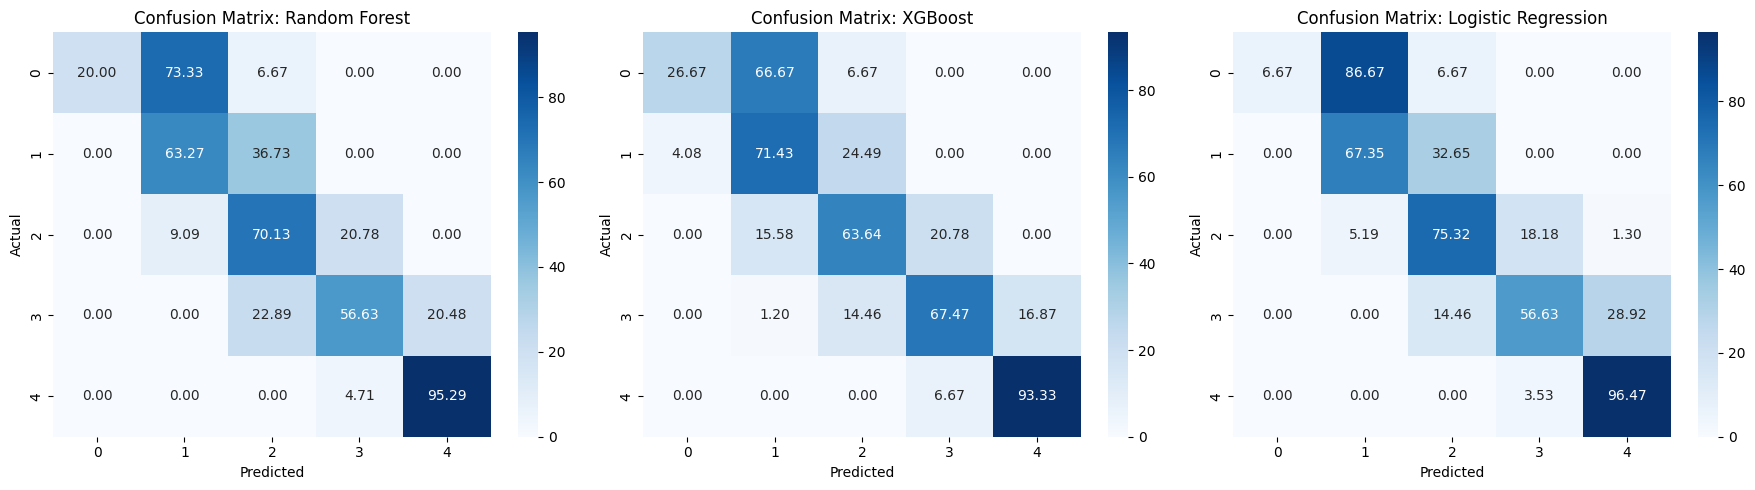

In [44]:
def plot_confusion_matrix(y_true, y_pred, model_name, ax):
    cm = confusion_matrix(y_true, y_pred)
    
    # Normalize confusion matrix to get percentages
    cm_percent = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100
    
    sns.heatmap(cm_percent, annot=True, fmt='.2f', cmap='Blues', cbar=True, ax=ax)
    ax.set_title(f'Confusion Matrix: {model_name}')
    ax.set_ylabel('Actual')
    ax.set_xlabel('Predicted')

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Plot confusion matrix for Random Forest
plot_confusion_matrix(y_test, rf_test_pred, "Random Forest", axes[0])

# Plot confusion matrix for XGBoost
plot_confusion_matrix(y_test, xgb_test_pred, "XGBoost", axes[1])

# Plot confusion matrix for Logistic Regression
plot_confusion_matrix(y_test, y_test_pred, "Logistic Regression", axes[2])

plt.tight_layout()
plt.show()


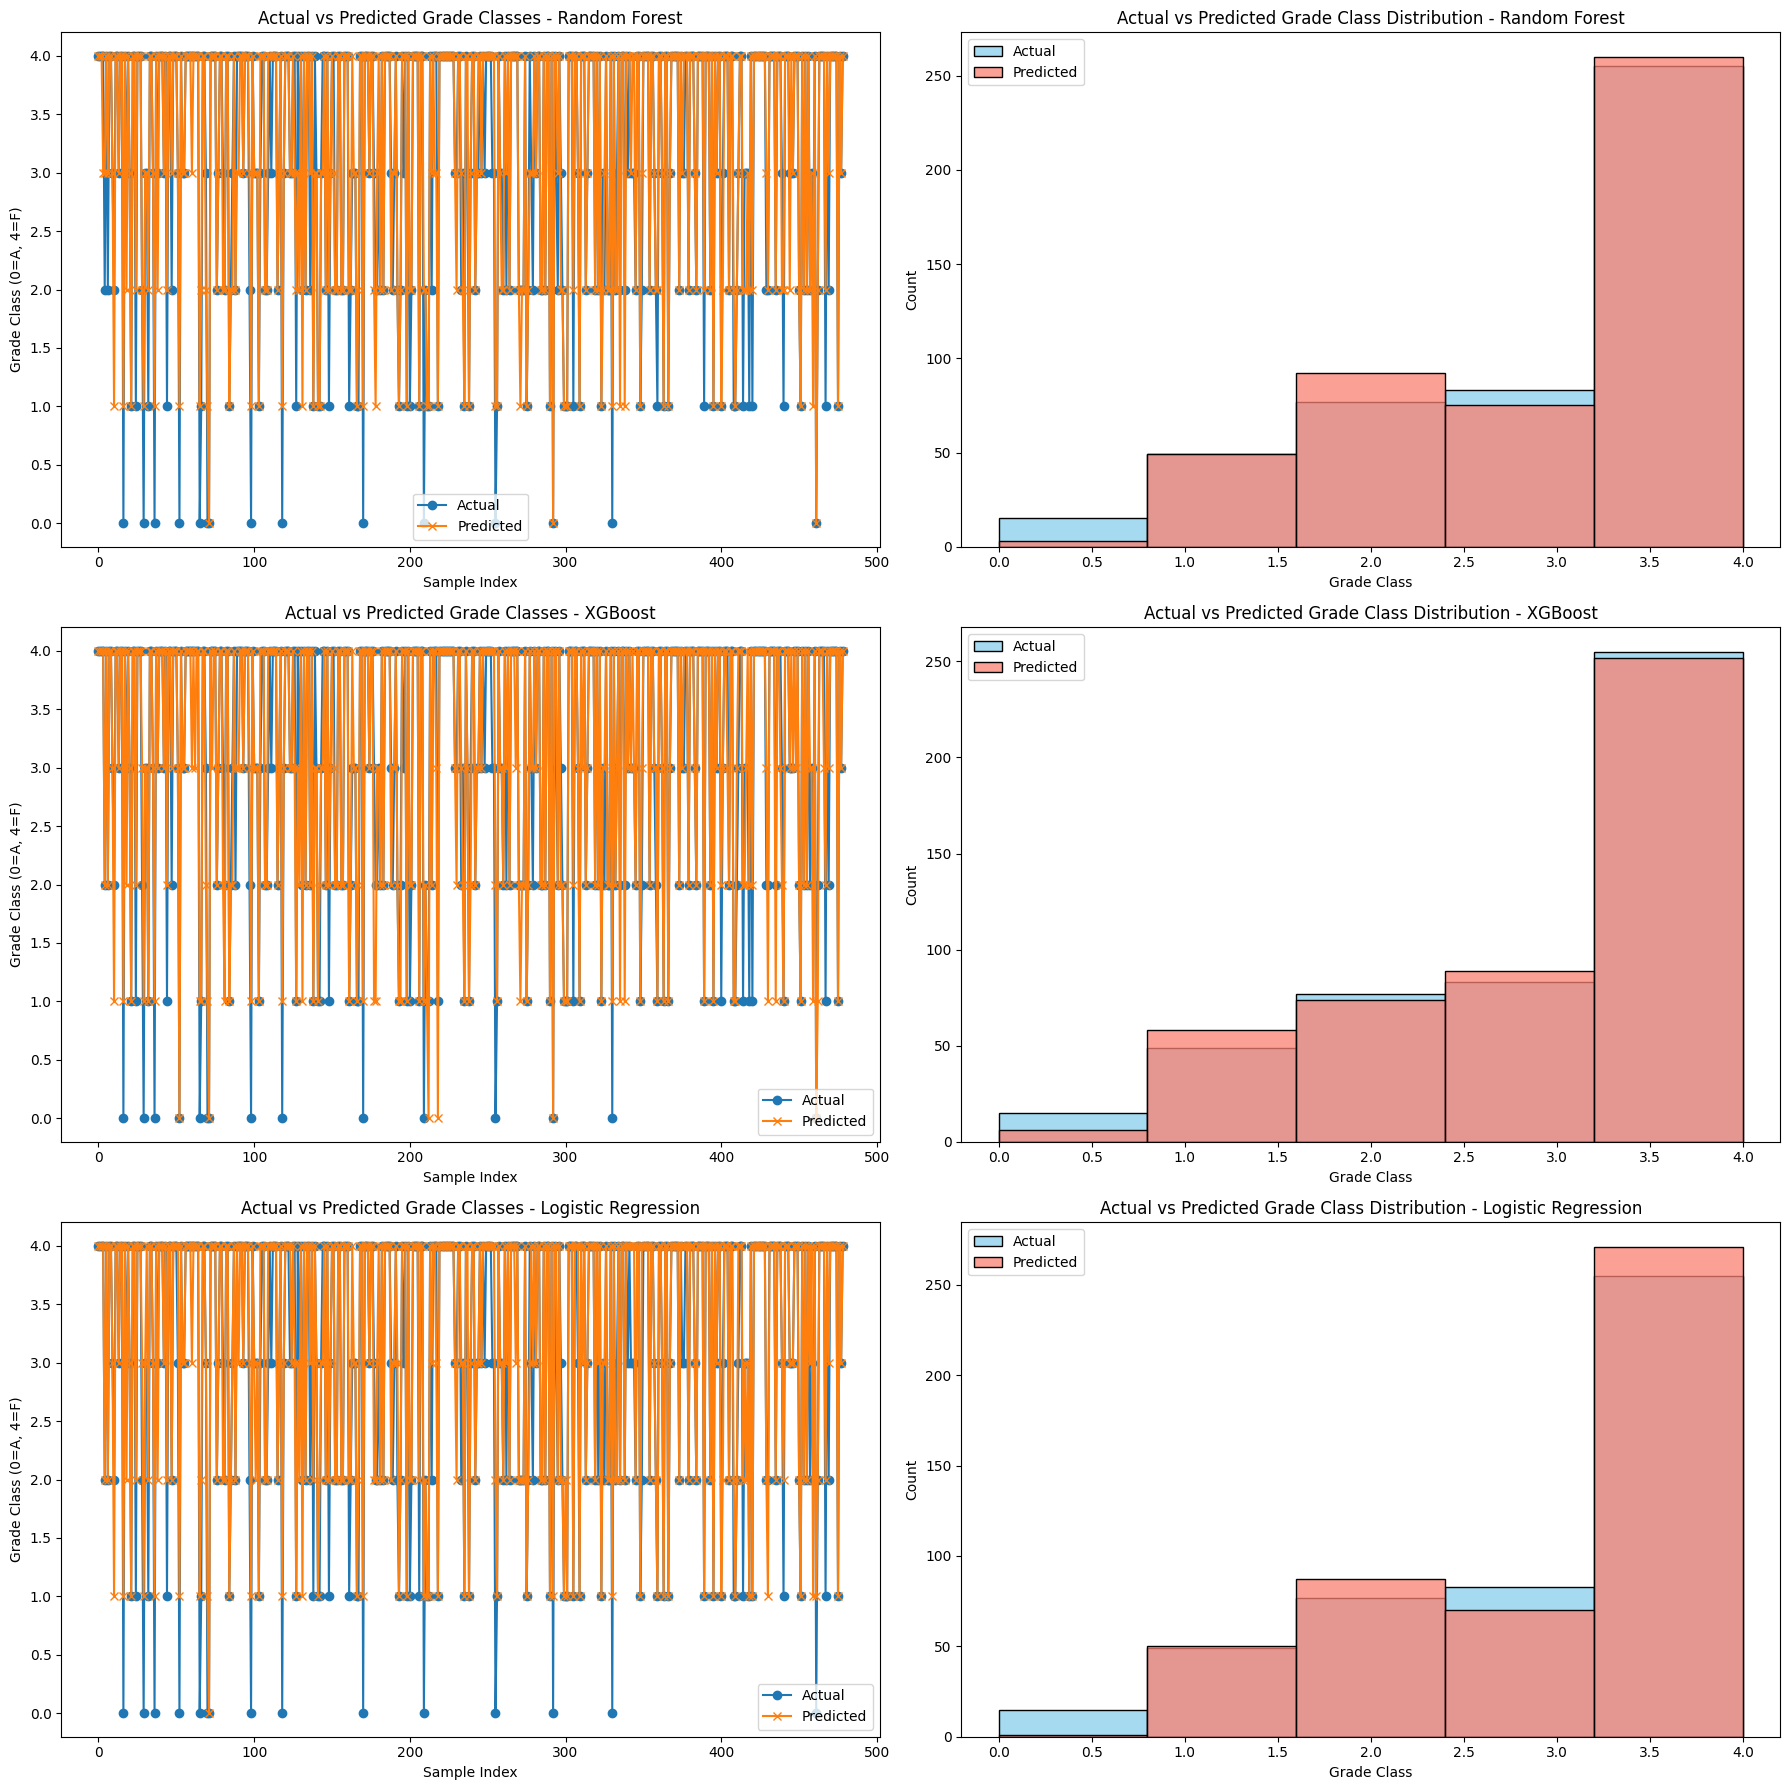

In [45]:
def plot_predictions_and_distributions(y_test, y_pred, model_name, ax1, ax2):
    # Predicted vs Actual
    results_df = pd.DataFrame({
        'Actual': y_test,
        'Predicted': y_pred
    }).reset_index(drop=True)
    
    ax1.plot(results_df['Actual'], label='Actual', marker='o')
    ax1.plot(results_df['Predicted'], label='Predicted', marker='x')
    ax1.set_title(f'Actual vs Predicted Grade Classes - {model_name}')
    ax1.set_xlabel('Sample Index')
    ax1.set_ylabel('Grade Class (0=A, 4=F)')
    ax1.legend()

    # Distribution Comparison
    sns.histplot(results_df['Actual'], kde=False, bins=5, label='Actual', color='skyblue', ax=ax2)
    sns.histplot(results_df['Predicted'], kde=False, bins=5, label='Predicted', color='salmon', ax=ax2)
    ax2.set_title(f'Actual vs Predicted Grade Class Distribution - {model_name}')
    ax2.set_xlabel('Grade Class')
    ax2.set_ylabel('Count')
    ax2.legend()

# Create a 3x2 grid of subplots (3 rows, 2 columns)
fig, axes = plt.subplots(3, 2, figsize=(18, 18))
# Plot for Random Forest
plot_predictions_and_distributions(y_test, rf_test_pred, "Random Forest", axes[0, 0], axes[0, 1])
# Plot for XGBoost
plot_predictions_and_distributions(y_test, xgb_test_pred, "XGBoost", axes[1, 0], axes[1, 1])
# Plot for Logistic Regression
plot_predictions_and_distributions(y_test, y_test_pred, "Logistic Regression", axes[2, 0], axes[2, 1])
# Adjust layout for better spacing
plt.tight_layout()
plt.show()

In [46]:
print(df.columns.tolist())

['Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'CorrectedGradeClass']


In [47]:
# encode target labels
le = LabelEncoder()
y_encoded = le.fit_transform(y)

In [48]:
# # scale the features
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

In [49]:
# train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

y_train_cat = to_categorical(y_train, num_classes=5)
y_test_cat = to_categorical(y_test, num_classes=5)

In [50]:
# building the model
model = Sequential()
model.add(Dense(64, input_shape=(X_train.shape[1],), activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(32, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [51]:
# training the model
history = model.fit(X_train, y_train_cat, 
                    validation_data=(X_test, y_test_cat),
                    epochs=50,
                    batch_size=32)


Epoch 1/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - accuracy: 0.2885 - loss: 1.6813 - val_accuracy: 0.5282 - val_loss: 1.1350
Epoch 2/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5786 - loss: 1.0922 - val_accuracy: 0.6430 - val_loss: 0.8811
Epoch 3/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6320 - loss: 0.9094 - val_accuracy: 0.6618 - val_loss: 0.7854
Epoch 4/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.6561 - loss: 0.7922 - val_accuracy: 0.6681 - val_loss: 0.7235
Epoch 5/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6781 - loss: 0.7282 - val_accuracy: 0.7015 - val_loss: 0.6932
Epoch 6/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6930 - loss: 0.7148 - val_accuracy: 0.6952 - val_loss: 0.6640
Epoch 7/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7116 - loss: 0.6628 - val_accuracy: 0.7432 - val_loss: 0.6456
Epoch 8/50
60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7278 - loss: 0.6360 - val_accuracy: 0.7370 - val_loss:

In [52]:
loss, accuracy = model.evaluate(X_train, y_train_cat)
print(f"Train Accuracy: {accuracy * 100:.2f}%")

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8346 - loss: 0.3831
Train Accuracy: 84.06%


In [53]:
# testing accuaracy of this model
loss, accuracy = model.evaluate(X_test, y_test_cat)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7886 - loss: 0.5016 
Test Accuracy: 79.75%


In [54]:
#display all column names in the df
print(df.columns.tolist())

['Ethnicity', 'ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'Extracurricular', 'Sports', 'CorrectedGradeClass']


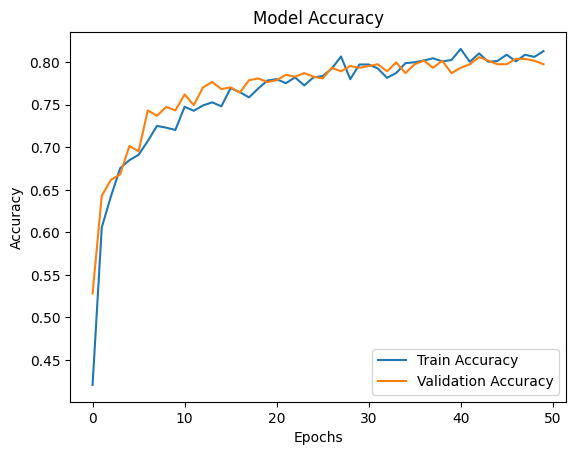

In [55]:
# plot accuracy(just to show visually how accuarte it is)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epochs') #epochs is the cycles
plt.ylabel('Accuracy')
plt.legend()
plt.show()


In [56]:
# save model and preprocessors
model.save("gradeclass_model.keras")
joblib.dump(scaler, "scaler_full.pkl")
joblib.dump(le, "label_encoder.pkl")

['label_encoder.pkl']